In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load in data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQCSgfZeDaip8fMkiH-rsoaUBenNly51t9fWi9iJjIEBB-GXJEAbMvowcP6eqrPH-IRVffefEvCFekh/pub?output=csv')

In [3]:
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

##Visualisation

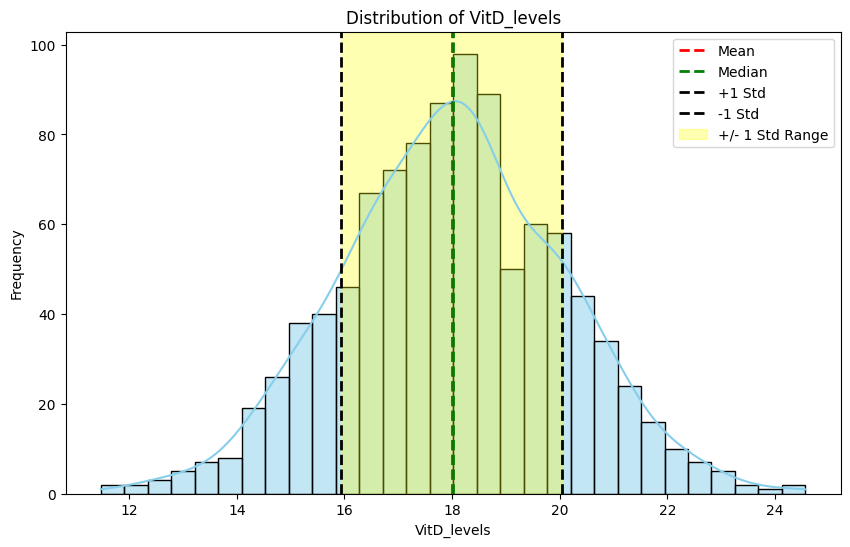

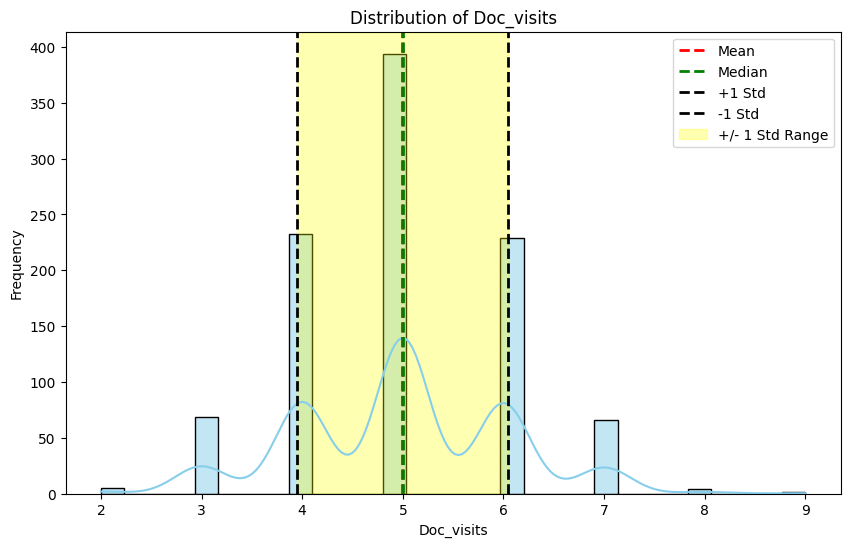

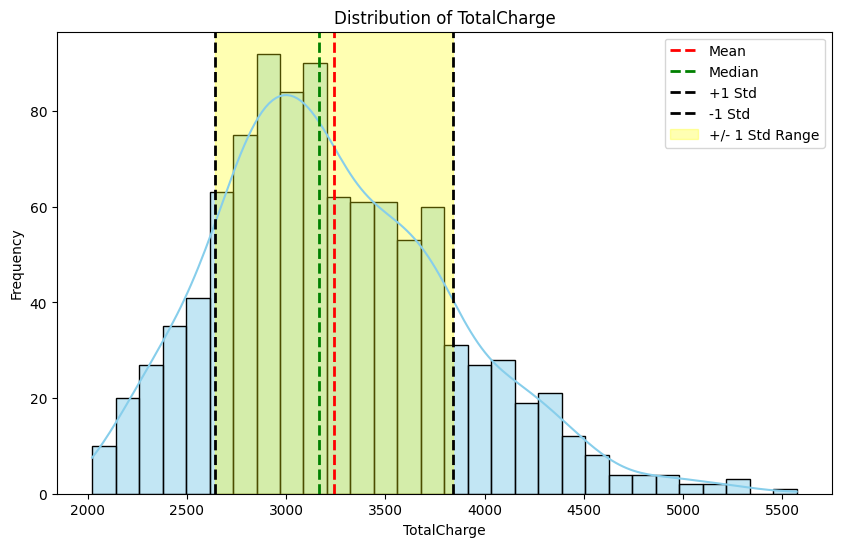

In [5]:
# Features to analyze
features_to_analyze = ['VitD_levels', 'Doc_visits', 'TotalCharge']

# Loop through each feature and create the described visualizations
for feature in features_to_analyze:
    # Create a figure and axis
    plt.figure(figsize=(10, 6))

    # Plot Histogram with KDE
    sns.histplot(df[feature], kde=True, color='skyblue', bins=30)

    # Add Mean, Median, and Std Deviation Lines
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    std_val = df[feature].std()

    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label='Median')
    plt.axvline(mean_val + std_val, color='black', linestyle='dashed', linewidth=2, label='+1 Std')
    plt.axvline(mean_val - std_val, color='black', linestyle='dashed', linewidth=2, label='-1 Std')

    # Highlight Range Between +1 and -1 Std
    plt.axvspan(mean_val - std_val, mean_val + std_val, color='yellow', alpha=0.3, label='+/- 1 Std Range')

    # Set plot title and labels
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


##VitD_levels

In [7]:
skewness_vitD_levels = df['VitD_levels'].skew()
print(f'Skewness of VitD_levels: {skewness_vitD_levels}')


Skewness of VitD_levels: -0.00027169884662487336


In [8]:
kurtosis_vitD_levels = df['VitD_levels'].kurtosis()
print(f'Kurtosis of VitD_levels: {kurtosis_vitD_levels}')


Kurtosis of VitD_levels: 0.01923757513616131


**Is it Discrete or Continuous?**

Continuous Variable: It can take on any value within a given range. They are typically measurements and can have fractional values.


**Does it have a skew? If so, which direction (+/-)**

A negative skewness indicates a distribution that is skewed to the left.


**What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)**

This kurtosis value is close to 0, suggesting that the distribution of VitD_levels is mesokurtic


##Doc_visits

In [9]:
skewness_doc_visits = df['Doc_visits'].skew()
print(f'Skewness of Doc_visits: {skewness_doc_visits}')


Skewness of Doc_visits: 0.031644828091398125


In [10]:
kurtosis_doc_levels = df['Doc_visits'].kurtosis()
print(f'Kurtosis of Doc_visits: {kurtosis_doc_levels}')


Kurtosis of Doc_visits: -0.002020272900551845


**Is it Discrete or Continuous?**

Discrete Variable: Countable and take on distinct values. They often represent counts of items or events.

**Does it have a skew? If so, which direction (+/-)**

A positive skewness indicates a distribution that is skewed to the right.


**What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)**

Platykurtic: Tails are lighter than a normal distribution (negative kurtosis).


##TotalCharge

In [11]:
skewness_total_levels = df['TotalCharge'].skew()
print(f'Skewness of TotalCharge: {skewness_total_levels}')


Skewness of TotalCharge: 0.5847985420036158


In [12]:
kurtosis_vitD_levels = df['TotalCharge'].kurtosis()
print(f'Kurtosis of TotalCharge: {kurtosis_vitD_levels}')


Kurtosis of TotalCharge: 0.27236165544347646


**Is it Discrete or Continuous?**

Continuous Variable: It can take on any value within a given range. They are typically measurements and can have fractional values.

**Does it have a skew? If so, which direction (+/-)**

A positive skewness indicates a distribution that is skewed to the right.


**What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)**

Leptokurtic: Tails are heavier than a normal distribution (positive kurtosis).
